<a href="https://colab.research.google.com/github/fsajad9/Power_flow/blob/main/IPM3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
import numpy as np
import matplotlib.pyplot as plt

In [153]:
def clas(A,b,c,y,x,s,ep,gap,thet,Z1,Z2,Z3,I,zv,eee,alp,m,mu):
  f1=[gap]
  k=0
  mu=mu
  u=[]
  u.append(np.dot(c.T,x))
  while gap>ep:
    k+=1
    mu=mu*(1-thet)
    #mu=np.dot(x.T,s)/4
    X=np.diag(x)
    S=np.diag(s)
    M=np.block([[A,Z1,Z2.T],[Z3,A.T,I],[S,Z2,X]])
    B=np.block([zv,zv,zv,mu*eee-x*s])
    sol=np.dot(np.linalg.inv(M),B.T)
    x=x+alp*sol[0:2*m]
    y=y+alp*sol[2*m:3*m]
    s=s+alp*sol[3*m:]
    f1.append(gap)
    gap=np.dot(c.T,x)-np.dot(b.T,y)
    print([np.dot(c.T,x),np.dot(b.T,y)])
    u.append(np.dot(c.T,x))
  return gap,k,f1,u

In [154]:
def BB(x,s,mu,m):
  zv=np.zeros(m)
  eee=np.array([1 for i in range(2*m)])
  return np.block([zv,zv,zv,mu*eee-x*s])
def MM(A,Z1,Z2,Z3,I,x,s):
  X=np.diag(x)
  S=np.diag(s)
  return np.block([[A,Z1,Z2.T],[Z3,A.T,I],[S,Z2,X]])

In [190]:
def impro(A,b,c,y,x,s,ep,gap,thet,Z1,Z2,Z3,I,zv,eee,alp,m,mu):
  f2=[gap]
  k=0
  u=[]
  u.append(np.dot(c.T,x))
  while k<10:
    if k==0:
      mu=mu*(1-thet)
      M=MM(A,Z1,Z2,Z3,I,x,s)
      B=BB(x,s,mu,m)
      sol=np.dot(np.linalg.inv(M),B.T)
      xx=x+alp*sol[0:2*m]
      yy=y+alp*sol[2*m:3*m]
      ss=s+alp*sol[3*m:]
      M=MM(A,Z1,Z2,Z3,I,0.5*(x+xx),0.5*(s+ss))
      B=BB(x,s,0,m)
      sol=np.dot(np.linalg.inv(M),B.T)
      x=x+alp*sol[0:2*m]
      y=y+alp*sol[2*m:3*m]
      s=s+alp*sol[3*m:]
      gap=np.dot(c.T,x)-np.dot(b.T,y)
      tt=np.dot(c.T,x)
    else:
      mu=mu*(1-thet)
      #mu=np.dot(x.T,s)/4
  
      M=MM(A,Z1,Z2,Z3,I,0.5*(x+xx),0.5*(s+ss))
      B=BB(x,s,mu,m)
      sol=np.dot(np.linalg.inv(M),B.T)
      xx=x+alp*sol[0:2*m]
      yy=y+alp*sol[2*m:3*m]
      ss=s+alp*sol[3*m:]
       # mu=mu*(1-thet)
      M=MM(A,Z1,Z2,Z3,I,0.5*(x+xx),0.5*(s+ss))
      B=BB(x,s,0,m)
      sol=np.dot(np.linalg.inv(M),B.T)
      x=x+alp*sol[0:2*m]
      y=y+alp*sol[2*m:3*m]
      s=s+alp*sol[3*m:]
      tt=np.dot(c.T,x)
    f2.append(gap)
    gap=np.dot(c.T,x)-np.dot(b.T,y)
    k=k+1
    print([np.dot(c.T,x),np.dot(b.T,y)])
    u.append(tt)
  return gap,k,f2,u  


In [191]:
m=50
n=2*m
I1=np.eye(m)
A=np.block([I1,I1])
ee=np.array([1 for i in range(m)])
b=2*ee
zv=np.zeros(m)
c=np.block([-ee,zv])
y=-2*ee
s=np.block([ee,2*ee])
x=np.block([ee,ee])
Z1=np.zeros((m,m))
Z2=np.zeros((2*m,m))
Z3=np.zeros((2*m,2*m))
ep=10**(-6)
I=np.eye(2*m)
mu=1
thet=0.05
gap=np.dot(c.T,x)-np.dot(b.T,y)
alp=1
eee=np.array([1 for i in range(2*m)])

In [192]:
gap1,k1,f1,u1=clas(A,b,c,y,x,s,ep,gap,thet,Z1,Z2,Z3,I,zv,eee,alp,m,mu)

[-66.66666666666667, -161.66666666666663]
[-72.26190476190476, -162.51190476190476]
[-72.9721876958539, -158.7096876958539]
[-73.74055119858255, -155.1911761985825]
[-74.51140593289269, -151.8894996828926]
[-75.28179128582882, -148.7909803483288]
[-76.04996347565948, -145.8836930850344]
[-76.8142446851038, -143.15628781401]
[-77.57301512290499, -140.59795609536584]
[-78.32472739276366, -138.1984213166015]
[-79.0679193131148, -135.94792854076067]
[-79.80122455373595, -133.8372333199996]
[-80.52338100467509, -131.8575893326255]
[-81.23323688512335, -130.00073479667626]
[-81.9297546725258, -128.25887768850106]
[-82.61201299130875, -126.62467985648522]
[-83.27920664524375, -125.09124016716137]
[-83.93064500780122, -123.65207685362299]
[-84.56574900190301, -122.30110925543367]
[-85.18404690591174, -121.03263914676586]
[-85.78516921849715, -119.84133184730854]
[-86.36884280331725, -118.72219730068807]
[-86.93488451731679, -117.67057128981907]
[-87.48319450576106, -116.68209693963823]
[-88.01

In [193]:
gap2,k2,f2,u2=impro(A,b,c,y,x,s,ep,gap,thet,Z1,Z2,Z3,I,zv,eee,alp,m,mu)


[-76.94610778443115, -76.94610778443115]
[-95.25520154680032, -95.25520154680031]
[-99.31867831734618, -99.31867831734618]
[-99.91035045426835, -99.91035045426835]
[-99.98919338480023, -99.98919338480025]
[-99.99879854158819, -99.9987985415882]
[-99.99987698222165, -99.99987698222166]
[-99.99998841501133, -99.99998841501134]
[-99.99999899794284, -99.99999899794284]
[-99.99999992049581, -99.99999992049581]


In [194]:
print([k1,k2])

[360, 10]


In [195]:
s1=min(u1)
s2=min(u2)
s=min(s1,s2)
f1=u1-s+10**(-11)
f2=u2-s+10**(-11)

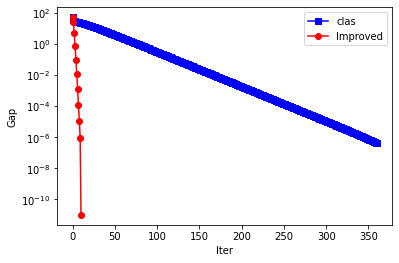

In [196]:
plt.plot(f1,'s-',label='clas',color='blue')
plt.plot(f2,'o-',label='Improved',color='red')
plt.xlabel('Iter')
plt.ylabel('Gap')
plt.legend()
plt.yscale('log')
plt.show()